# Group 9

Benedikt Krupp (Sirati),
Matsuo Takumi, 
Bi Jing,
Eguchi Aoi

# Titanic

## Import packages and read data

In [1]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
import csv
import time
import math
import seaborn as sns
%matplotlib inline

In [18]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
truth = pd.read_csv("./gender_submission.csv")
train.head(10)
#train.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Preprocess data
1. Fill missing data with median
2. Convert non-numerical variables into integer
3. Drop the useless variables

In [19]:
def miss_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : 'Missed event', 1 : '%'})
        return kesson_table_ren_columns 
miss_table(train)

,Missed event,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [20]:
miss_table(test)

,Missed event,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [21]:
# Fill missing values with median
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")

test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

miss_table(train)

,Missed event,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [22]:
# Convert non-numerical number into integer
train.loc[train.Sex == "male", "Sex"] = 0
train.loc[train.Sex == "female", "Sex"] = 1
train.loc[train.Embarked == "S", "Embarked"] = 0
train.loc[train.Embarked == "C", "Embarked"] = 1
train.loc[train.Embarked == "Q", "Embarked"] = 2

test.loc[test.Sex == "male", "Sex"] = 0
test.loc[test.Sex == "female", "Sex"] = 1
test.loc[test.Embarked == "S", "Embarked"] = 0
test.loc[test.Embarked == "C", "Embarked"] = 1
test.loc[test.Embarked == "Q", "Embarked"] = 2
#convert Age into small amount of integer
train.loc[ train.Age <= 15, 'Age'] = 0
train.loc[(train.Age > 15) & (train.Age <= 30), 'Age'] = 1
train.loc[(train.Age > 30) & (train.Age <= 45), 'Age'] = 2
train.loc[(train.Age > 45) & (train.Age <= 60), 'Age'] = 3
train.loc[ train.Age > 60, 'Age'] = 4 

test.loc[ test.Age <= 15, 'Age'] = 0
test.loc[(test.Age > 15) & (test.Age <= 30), 'Age'] = 1
test.loc[(test.Age > 30) & (test.Age <= 45), 'Age'] = 2
test.loc[(test.Age > 45) & (test.Age <= 60), 'Age'] = 3
test.loc[ test.Age > 60, 'Age'] = 4 

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,1.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,1


In [23]:
#drop useless variables
train = train.drop(['Name', 'Ticket','Cabin'], axis = 1)
test = test.drop(['Name', 'Ticket','Cabin'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,7.2500,0
1,2,1,1,1,2.0,1,0,71.2833,1
2,3,1,3,1,1.0,0,0,7.9250,0
3,4,1,1,1,2.0,1,0,53.1000,0
4,5,0,3,0,2.0,0,0,8.0500,0


In [24]:
# Convert pandas DataFlame into numpy array
#parameter_names = ["Pclass","Sex","Age","Fare"]
parameter_names = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

train_label = train["Survived"].values
train_data = preprocessing.minmax_scale(train[parameter_names].values) 
test_data = preprocessing.minmax_scale(test[parameter_names].values) 

## Classical SVM

In [25]:
model = svm.SVC(kernel='rbf', gamma=10, C=10)
#model = svm.SVC(kernel='linear', gamma=1, C=10)
model.fit(train_data, train_label)

test_pred = model.predict(test_data)

In [26]:
# Get PassengerId
PassengerId = np.array(test["PassengerId"]).astype(int)
 
# Make DataFrame with test_pred and PassengerId
my_solution = pd.DataFrame(test_pred, PassengerId, columns = ["Survived"])
 
# Write down into my_pred.csv
my_solution.to_csv("my_pred.csv", index_label = ["PassengerId"])

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy score : ", accuracy_score(truth["Survived"], test_pred)) 
print("Precision score : ", precision_score(truth["Survived"], test_pred))
print("Recall score      : ", recall_score(truth["Survived"], test_pred))

Accuracy score :  0.8421052631578947
Precision score :  0.8071428571428572
Recall score      :  0.743421052631579


## Data compression

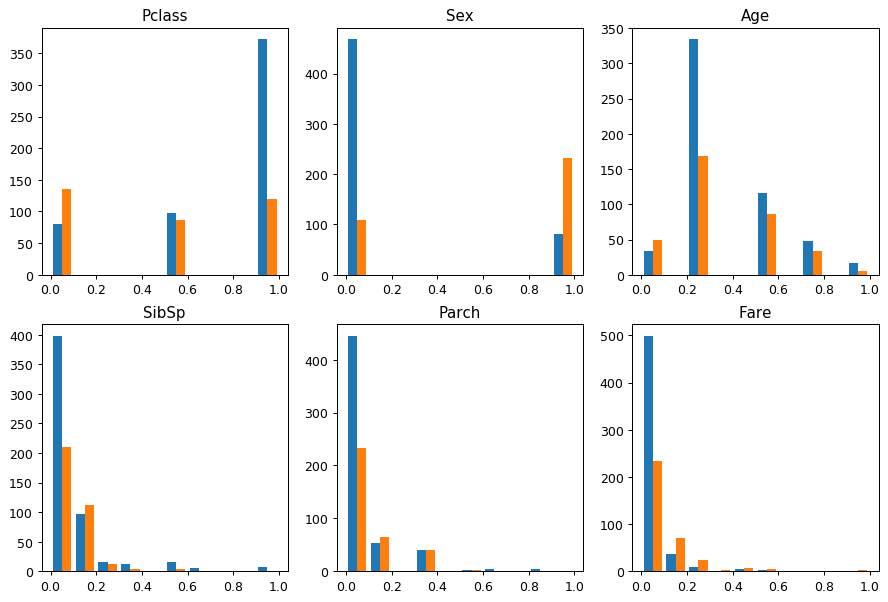

In [27]:
# Original data
fig = plt.figure(figsize=(12,8),dpi=90)
n_par = len(parameter_names)
for i in range(n_par-1):
    plt.subplot(2,3,i+1)
    plt.title(parameter_names[i])
    f = train_data[:,i]
    plt.hist([f[train_label==0], f[train_label==1]], stacked=False)

In [28]:
X_train_scaled = pd.DataFrame(train_data)
X_test_scaled = pd.DataFrame(test_data)

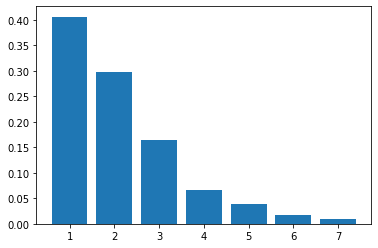

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
plt.show()

X_train_pca shape: (891, 2)
explained variance ratio: [0.4031428 0.3035965]


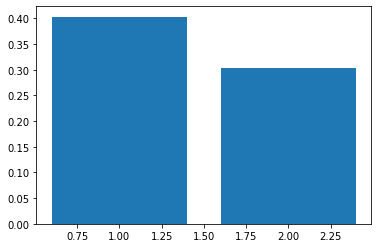

In [30]:
# Compresss data into 2-dim by using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))

# Explainde variance ratio
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
plt.show()

In [39]:
model.fit(X_train_pca, train_label)

test_pred_pca = model.predict(X_test_pca)

# Get PassengerId
PassengerId = np.array(test["PassengerId"]).astype(int)
 
# Make DataFrame with test_pred and PassengerId
my_solution = pd.DataFrame(test_pred, PassengerId, columns = ["Survived"])
 
# Write down into my_pred.csv
my_solution.to_csv("my_pred_pca.csv", index_label = ["PassengerId"])

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy score : ", accuracy_score(truth["Survived"], test_pred_pca)) 
print("Precision score : ", precision_score(truth["Survived"], test_pred_pca))
print("Recall score      : ", recall_score(truth["Survived"], test_pred_pca))

Accuracy score :  0.8899521531100478
Precision score :  1.0
Recall score      :  0.6973684210526315


### Actually, better than 7-dim

## Quantum approach

### First order diagonal expansion

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import functools

from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap,ZZFeatureMap, PauliFeatureMap
from qiskit.aqua import QuantumInstance
from qiskit.aqua.components.feature_maps import self_product
from qiskit.aqua.algorithms import QSVM
from qiskit.ml.datasets import ad_hoc_data, breast_cancer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
import logging
from qiskit.aqua import set_qiskit_aqua_logging

%matplotlib inline

In [33]:
training_dataset = {'A': X_train_pca[train_label==0], 'B':X_train_pca[train_label==1]}

In [34]:
feature_dim = 2
# Using the statevector simulator
backend = BasicAer.get_backend('statevector_simulator')
random_seed = 10598

quantum_instance = QuantumInstance(backend, seed_simulator=random_seed, seed_transpiler=random_seed)

In [35]:
# Generate the feature map
feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=2)

# Run the Quantum Kernel Estimator and classify the test data
#qsvm = QSVM(feature_map=feature_map, training_dataset=training_dataset, test_dataset=test_dataset)
qsvm = QSVM(feature_map=feature_map, training_dataset=training_dataset)

# Train with only 100 events (in order to shorten the executing time)
qsvm.train(X_train_pca[:100],train_label[:100], quantum_instance)

In [36]:
prediction = qsvm.predict(X_test_pca, quantum_instance)

In [37]:
# Get PassengerId
PassengerId = np.array(test["PassengerId"]).astype(int)
 
# Make DataFrame with test_pred and PassengerId
my_solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
 
# Write down into my_pred.csv
my_solution.to_csv("my_pred_qsvm.csv", index_label = ["PassengerId"])
print("Accuracy score : ", accuracy_score(truth["Survived"], prediction)) 
print("Precision score : ", precision_score(truth["Survived"], prediction))
print("Recall score      : ", recall_score(truth["Survived"], prediction))


Accuracy score :  0.7559808612440191
Precision score :  1.0
Recall score      :  0.32894736842105265


## Because running VQC collapses on my PC, we will not demo the code again.
## However, there are many other ways to classify, not only SVM or VQC